# IDEAM - Precipitación



In [17]:
!pip install pandas
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## **ETAPA 1**
### FASE1: EDA

In [18]:
# 1.1 Carga y primera inspección
print("\nCARGA Y PRIMERA INSPECCIÓN")
print("-" * 35)

import pandas as pd

# Cargar los datos
df = pd.read_csv('./precipitacion_2025sem01_JoseMariaCordova.csv', sep=';', encoding='utf-8')

print(f"✓ Dataset cargado exitosamente")
print(f"✓ Dimensiones del dataset: {df.shape[0]} filas × {df.shape[1]} columnas")

# Información básica del dataset
print("\nPrimeras 5 filas:")
print(df.head())

print("\nÚltimas 5 filas:")
print(df.tail())

print("\nTipos de datos:")
print(df.dtypes)

print("\nNombres de columnas:")
print(df.columns.tolist())



CARGA Y PRIMERA INSPECCIÓN
-----------------------------------
✓ Dataset cargado exitosamente
✓ Dimensiones del dataset: 1600 filas × 2 columnas

Primeras 5 filas:
  FechaObservacion  ValorObservado
0  3/01/2025 16:00             0.4
1  3/01/2025 21:00             0.4
2   4/01/2025 0:14             0.4
3   4/01/2025 0:26             0.4
4   4/01/2025 2:30             0.4

Últimas 5 filas:
            FechaObservacion  ValorObservado
1595  06/27/2025 12:26:00 PM             1.2
1596  06/27/2025 12:28:00 PM             1.2
1597  06/27/2025 12:30:00 PM             0.4
1598  06/27/2025 12:32:00 PM             0.4
1599  06/27/2025 12:40:00 PM             0.4

Tipos de datos:
FechaObservacion     object
ValorObservado      float64
dtype: object

Nombres de columnas:
['FechaObservacion', 'ValorObservado']


In [19]:
# 1.2 Evaluación de calidad

print("\n\nEVALUACIÓN DE CALIDAD")
print("-" * 25)

# Datos faltantes
print("Datos faltantes por columna:")
missing_data = df.isnull().sum()
for col in df.columns:
    missing_count = missing_data[col]
    missing_pct = (missing_count / len(df)) * 100
    print(f"  - {col}: {missing_count} ({missing_pct:.2f}%)")

# Duplicados
print("\nRegistros duplicados:")

total_duplicados = df.duplicated().sum()

if total_duplicados ==0:
    print("No se encontraron registros duplicados")
else:
    print(f"\nTotal registros duplicados encontrados : {total_duplicados} ({(total_duplicados/len(df)*100):.2f}%) \n")

    duplicados = df.groupby(['FechaObservacion', 'ValorObservado']).size().reset_index(name='veces_duplicado')
    # Filtra solo los registros que están duplicados (aparecen más de una vez)
    duplicados = duplicados[duplicados['veces_duplicado'] > 1]
    print(duplicados)

# Valores únicos por columna
print(f"\nValores únicos por columna:")
for col in df.columns:
  print(f"{col}: {df[col].nunique()} valores únicos")

# Crear copia para no modificar original
df_procesado = df.copy()

# Conversión de fecha y validación de consistencia
print(f"\nConversión y validación de fechas:")
try:
    df_procesado['FechaObservacion'] = pd.to_datetime(df_procesado['FechaObservacion'])
    print("✓ Conversión de fechas exitosa")

except Exception as e:
    print(f"✗ Error en conversión de fechas: Posible inconsistencia de formato\n")

try:
    print('Intentando conversión de fechas con formato mezclado... un momento por favor!')
    # Convertir la columna de FechaObservacion a datetime, previendo formatos mezclados
    df_procesado['FechaObservacion'] = pd.to_datetime(df_procesado['FechaObservacion'], format='mixed')
    print("✓ Conversión de fechas exitosa")

    # Rango temporal
    fecha_min = df_procesado['FechaObservacion'].min()
    fecha_max = df_procesado['FechaObservacion'].max()
    duracion = fecha_max - fecha_min

    print(f"✓ Rango temporal: {fecha_min} a {fecha_max}")
    print(f"✓ Duración total: {duracion.days} días, {duracion.seconds//3600} horas")

except Exception as e:
    print(f"✗ Error en conversión de fechas: {e}")

# Validación de valores de Precipitación
print(f"\nValidación de valores de precipitación:")
prec_min = df_procesado['ValorObservado'].min()
prec_max = df_procesado['ValorObservado'].max()
print(f"✓ Rango de precipitación: {prec_min}mm a {prec_max}mm")

# Verificar valores extremos poco realistas
if prec_min < 0 or prec_max > 100:
    print("⚠️  Advertencia: Valores de precipitación fuera del rango típico para Medellín")




EVALUACIÓN DE CALIDAD
-------------------------
Datos faltantes por columna:
  - FechaObservacion: 0 (0.00%)
  - ValorObservado: 0 (0.00%)

Registros duplicados:

Total registros duplicados encontrados : 45 (2.81%) 

            FechaObservacion  ValorObservado  veces_duplicado
0     01/15/2025 04:12:00 AM             1.4                2
1     01/16/2025 04:10:00 AM             1.2                2
2     01/22/2025 04:08:00 AM            11.9                2
3     01/25/2025 04:06:00 AM             0.3                2
4     01/26/2025 01:32:00 AM             0.4                2
5     01/26/2025 06:32:00 AM             0.4                2
6     01/28/2025 04:04:00 AM            27.1                2
7     01/28/2025 04:08:00 AM            26.8                2
8     01/28/2025 04:10:00 AM             1.9                2
9     01/30/2025 01:34:00 AM             0.4                2
10    01/30/2025 01:40:00 AM             0.4                2
11    01/30/2025 01:48:00 AM         

## **FASE 2: Limpieza**

In [21]:
#2.1 Cargue de datos y preparación para la limpieza

# recreamos el dataframe procesado
df_procesado = df.copy()

# Convertimos las fechas según se identificó en el EDA
print("Convirtiendo las fechas con formato mezclado...")
df_procesado['FechaObservacion'] = pd.to_datetime(df_procesado['FechaObservacion'], format='mixed')

# Convertimos las precipitaciones a numérico
print("Convirtiendo las precipitaciones a valores numéricos...")
df_procesado['ValorObservado'] = pd.to_numeric(df_procesado['ValorObservado'], errors='coerce')

print(f"Datos cargados: {df_procesado.shape}")
print(f"Rango temporal: {df_procesado['FechaObservacion'].min()} a {df_procesado['FechaObservacion'].max()}")

Convirtiendo las fechas con formato mezclado...
Convirtiendo las precipitaciones a valores numéricos...
Datos cargados: (1600, 2)
Rango temporal: 2025-01-03 13:24:00 a 2025-06-27 13:02:00


## DUPLICADOS


In [31]:
#2.2. Eliminación de duplicados

print("2.2. Eliminación de duplicados")
print("-" * 40)

df_limpio = df_procesado.copy()
registros_iniciales = len(df_limpio)

# 2.1 Duplicados exactos (misma fecha y precipitacion)
duplicados_exactos = df_limpio.duplicated().sum()
print(f"\nDuplicados exactos encontrados: {duplicados_exactos}")

if duplicados_exactos > 0:
    print("Ejemplo de duplicados exactos:")
    ejemplos = df_limpio[df_limpio.duplicated(keep=False)].head(6)
    print(ejemplos[['FechaObservacion', 'ValorObservado']])

    # Eliminar duplicados exactos
    df_limpio = df_limpio.drop_duplicates()
    print(f"✓ Eliminados {duplicados_exactos} duplicados exactos")

# 2.2 Duplicados temporales (misma fecha, diferente precipitacion)
duplicados_temporales = df_limpio.duplicated(subset=['FechaObservacion'], keep=False)
num_duplicados_temporales = duplicados_temporales.sum()

if num_duplicados_temporales > 0:
    print(f"\nDuplicados temporales encontrados: {num_duplicados_temporales}")
    print("Ejemplo de duplicados temporales:")
    ejemplos_temp = df_limpio[duplicados_temporales].head(6)
    print(ejemplos_temp[['FechaObservacion', 'ValorObservado']])

    # Estrategia: mantener el promedio para cada timestamp
    print("Aplicando estrategia: promedio por timestamp")
    df_clean = df_limpio.groupby('FechaObservacion')['ValorObservado'].mean().reset_index()

    duplicados_resueltos = num_duplicados_temporales - len(df_limpio[df_limpio.duplicated(subset=['FechaObservacion'])])
    print(f"✓ Resueltos {duplicados_resueltos} duplicados temporales mediante promedio")

registros_finales = len(df_limpio)
eliminados = registros_iniciales - registros_finales

print("-" * 72)
print(f"\nResumen eliminación de duplicados:")
print(f"  Registros iniciales: {registros_iniciales:,}")
print(f"  Registros finales: {registros_finales:,}")
print(f"  Registros eliminados: {eliminados:,} ({eliminados/registros_iniciales*100:.2f}%)")

# 3. Calcular mediciones mínima, máxima y más frecuente
min_medicion = df['ValorObservado'].min()
max_medicion = df['ValorObservado'].max()
moda_medicion = df['ValorObservado'].mode()[0]

print(f"\nMedición mínima: {min_medicion} mm")
print(f"Medición máxima: {max_medicion} mm")
print(f"Medición más frecuente (moda): {moda_medicion} mm")
print("-" * 72)

2.2. Eliminación de duplicados
----------------------------------------

Duplicados exactos encontrados: 45
Ejemplo de duplicados exactos:
      FechaObservacion  ValorObservado
52 2025-01-03 13:24:00             0.4
53 2025-01-03 13:24:00             0.4
58 2025-01-04 01:20:00             0.4
59 2025-01-04 01:20:00             0.4
60 2025-01-04 06:20:00             0.4
61 2025-01-04 06:20:00             0.4
✓ Eliminados 45 duplicados exactos
------------------------------------------------------------------------

Resumen eliminación de duplicados:
  Registros iniciales: 1,600
  Registros finales: 1,555
  Registros eliminados: 45 (2.81%)

Medición mínima: 0.2 mm
Medición máxima: 27.1 mm
Medición más frecuente (moda): 0.4 mm
------------------------------------------------------------------------


## **ETAPA 2 - Temporada Seca**

In [30]:
#Análisis univariado - Variables temporales - Fecha de Observación

print("\nAnálisis univariado - Variables temporales - Fecha de Observación")
print("-" * 72)

# Ordenar por fecha
df_ordenado = df_procesado.sort_values('FechaObservacion')

# Calcular diferencias temporales
df_ordenado['diff_tiempo'] = df_ordenado['FechaObservacion'].diff()

# Estadísticas de intervalos
intervalos = df_ordenado['diff_tiempo'].dropna()

print(f"\nIntervalos entre mediciones:")
print(f"  Mínimo: {intervalos.min()}")
print(f"  Máximo: {intervalos.max()}")
print(f"  Promedio: {intervalos.mean()}")
print(f"  Mediana: {intervalos.median()}")

# Frecuencias más comunes
frecuencias_comunes = intervalos.value_counts().head(10)
print(f"\nIntervalos más frecuentes:")
for intervalo, cantidad in frecuencias_comunes.items():
    print(f"  {intervalo}: {cantidad} veces ({cantidad/len(intervalos)*100:.1f}%)")

# Análisis de gaps largos - Duración superior a 1 hora
gaps_largos = intervalos[intervalos > pd.Timedelta(hours=1)]
if len(gaps_largos) > 0:
    print(f"\nGaps largos (>1 hora) detectados: {len(gaps_largos)}")
    print(f"  Promedio de gaps largos: {gaps_largos.mean()}")


print("-" * 72)
# Calcular las diferencias de tiempo entre mediciones consecutivas
gaps = df_ordenado['FechaObservacion'].diff()

# Encontrar el gap más largo
max_gap = gaps.max()
max_gap_dias = max_gap.days

# Calcular los gaps de tiempo entre mediciones consecutivas
df_ordenado['gap'] = df_ordenado['FechaObservacion'].diff()

# Encontrar la fila que contiene el gap más largo
fila_max_gap = df_ordenado.loc[df_ordenado['gap'].idxmax()]

print(f"El gap más largo sin mediciones (temporada seca) es de: {max_gap_dias} días y {max_gap.seconds // 3600} horas.")
# Las fechas exactas corresponden a la fila donde ocurre el gap
# La fecha de inicio es la fecha de la fila anterior
fecha_inicio_gap = df_ordenado.loc[fila_max_gap.name - 1, 'FechaObservacion']

# La fecha de fin es la fecha de la fila actual (donde se encontró el gap)
fecha_fin_gap = fila_max_gap['FechaObservacion']

print(f"Entre las fechas:")
print(f"Inicio: {fecha_inicio_gap}")
print(f"Fin:    {fecha_fin_gap}")
print("-" * 72)



Análisis univariado - Variables temporales - Fecha de Observación
------------------------------------------------------------------------

Intervalos entre mediciones:
  Mínimo: 0 days 00:00:00
  Máximo: 22 days 23:30:00
  Promedio: 0 days 02:37:35.084427767
  Mediana: 0 days 00:04:00

Intervalos más frecuentes:
  0 days 00:02:00: 521 veces (32.6%)
  0 days 00:04:00: 277 veces (17.3%)
  0 days 00:06:00: 165 veces (10.3%)
  0 days 00:08:00: 80 veces (5.0%)
  0 days 00:10:00: 45 veces (2.8%)
  0 days 00:00:00: 45 veces (2.8%)
  0 days 00:12:00: 44 veces (2.8%)
  0 days 00:14:00: 30 veces (1.9%)
  0 days 00:16:00: 29 veces (1.8%)
  0 days 00:30:00: 17 veces (1.1%)

Gaps largos (>1 hora) detectados: 207
  Promedio de gaps largos: 0 days 19:26:31.304347826
------------------------------------------------------------------------
El gap más largo sin mediciones (temporada seca) es de: 22 días y 23 horas.
Entre las fechas:
Inicio: 2025-01-31 11:44:00
Fin:    2025-02-27 23:16:00
-------------

## **ETAPA 3 - Evento de lluvia**

In [42]:
# df_ordenado no existe, el dataframe inicial es 'df'.
df['FechaObservacion'] = pd.to_datetime(df['FechaObservacion'], errors='coerce')

df_ordenado = df.drop_duplicates(subset=['FechaObservacion', 'ValorObservado']).sort_values(by='FechaObservacion').reset_index(drop=True)

# Calcular la diferencia de tiempo entre mediciones consecutivas
df_ordenado['tiempo_entre_mediciones'] = df_ordenado['FechaObservacion'].diff()

# Identificar los inicios de nuevos eventos de lluvia
# Un evento de lluvia termina cuando el tiempo entre mediciones es mayor a 2 minutos
eventos = df_ordenado[df_ordenado['tiempo_entre_mediciones'] > pd.Timedelta(minutes=2)].index
inicios_eventos = [0] + list(eventos)
fines_eventos = list(eventos - 1) + [len(df_ordenado) - 1]

# Calcular la duración de cada evento de lluvia
duraciones = []
for inicio, fin in zip(inicios_eventos, fines_eventos):
    duracion = df_ordenado.loc[fin, 'FechaObservacion'] - df_ordenado.loc[inicio, 'FechaObservacion']
    duraciones.append({'inicio': df_ordenado.loc[inicio, 'FechaObservacion'],
                       'fin': df_ordenado.loc[fin, 'FechaObservacion'],
                       'duracion': duracion})

# Encontrar el evento con la duración máxima
df_duraciones = pd.DataFrame(duraciones)
evento_max_duracion = df_duraciones.loc[df_duraciones['duracion'].idxmax()]

# Imprimir el resultado
print(f"La duración máxima de un evento de lluvia es de: {evento_max_duracion['duracion']}")
print(f"El evento ocurrió entre las siguientes fechas:")
print(f"Inicio: {evento_max_duracion['inicio']}")
print(f"Fin:    {evento_max_duracion['fin']}")


La duración máxima de un evento de lluvia es de: 0 days 00:32:00
El evento ocurrió entre las siguientes fechas:
Inicio: 2025-03-11 20:52:00
Fin:    2025-03-11 21:24:00


## **ETAPA 4 - Totalización**

In [44]:
# -----------------------------------------------------------
# Totalización por hora y día
# -----------------------------------------------------------

# Extraer la fecha y la hora
df_ordenado['fecha'] = df_ordenado['FechaObservacion'].dt.date
df_ordenado['hora'] = df_ordenado['FechaObservacion'].dt.hour

# Agrupar por fecha y hora para sumar los valores observados
precipitacion_por_hora = df_ordenado.groupby(['fecha', 'hora'])['ValorObservado'].sum().reset_index()

# Encontrar el día y la hora con la máxima precipitación
max_precipitacion_hora = precipitacion_por_hora.loc[precipitacion_por_hora['ValorObservado'].idxmax()]

print("1. Máxima precipitación por hora:")
print(f"El día con la hora de máxima precipitación es: {max_precipitacion_hora['fecha']}")
print(f"La hora con la máxima precipitación es: {max_precipitacion_hora['hora']}:00 - {max_precipitacion_hora['hora']}:59")
print(f"Valor maximo de precipitación: {max_precipitacion_hora['ValorObservado']} mm")

# -----------------------------------------------------------
# Totalización por día
# -----------------------------------------------------------

# Agrupar solo por fecha para sumar las precipitaciones de todo el día
precipitacion_por_dia = df_ordenado.groupby('fecha')['ValorObservado'].sum().reset_index()

# Encontrar el día con la máxima precipitación
max_precipitacion_dia = precipitacion_por_dia.loc[precipitacion_por_dia['ValorObservado'].idxmax()]

print("\n2. Máxima precipitación por día:")
print(f"El día con la máxima precipitación es: {max_precipitacion_dia['fecha']}")
print(f"Valor maximo de precipitación: {max_precipitacion_dia['ValorObservado']} mm")

1. Máxima precipitación por hora:
El día con la hora de máxima precipitación es: 2025-04-02
La hora con la máxima precipitación es: 21.0:00 - 21.0:59
Valor maximo de precipitación: 19.2 mm

2. Máxima precipitación por día:
El día con la máxima precipitación es: 2025-06-04
Valor maximo de precipitación: 34.0 mm


## **ETAPA 5 - Visualización**

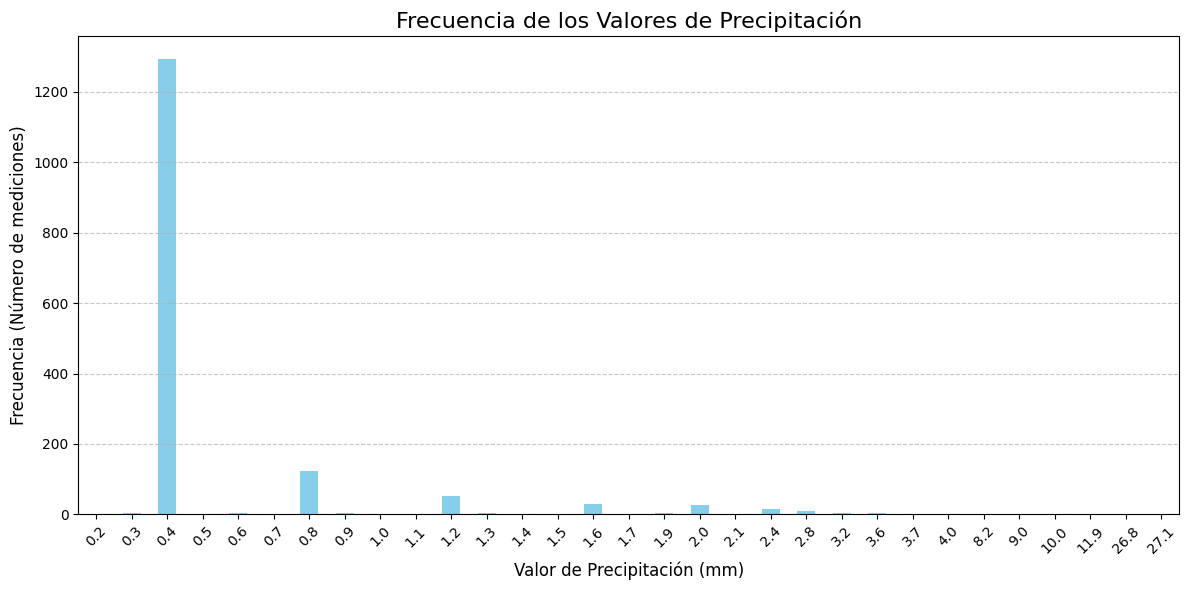

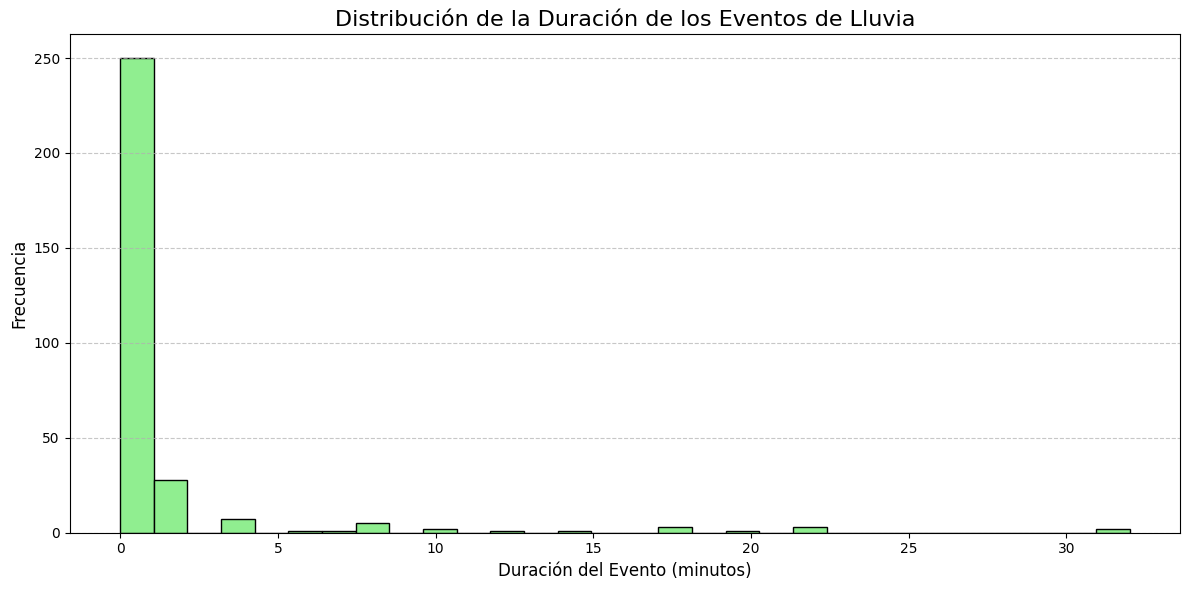

In [45]:
import matplotlib.pyplot as plt

# Calcular la frecuencia de cada valor de precipitación
frecuencia_valores = df['ValorObservado'].value_counts().sort_index()

# Crear el gráfico
plt.figure(figsize=(12, 6))
frecuencia_valores.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de los Valores de Precipitación', fontsize=16)
plt.xlabel('Valor de Precipitación (mm)', fontsize=12)
plt.ylabel('Frecuencia (Número de mediciones)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calcular la duración de cada evento de lluvia (código de la Etapa 3)
df_ordenado['tiempo_entre_mediciones'] = df_ordenado['FechaObservacion'].diff()
eventos = df_ordenado[df_ordenado['tiempo_entre_mediciones'] > pd.Timedelta(minutes=2)].index
inicios_eventos = [0] + list(eventos)
fines_eventos = list(eventos - 1) + [len(df_ordenado) - 1]

duraciones_minutos = []
for inicio, fin in zip(inicios_eventos, fines_eventos):
    duracion = df_ordenado.loc[fin, 'FechaObservacion'] - df_ordenado.loc[inicio, 'FechaObservacion']
    duraciones_minutos.append(duracion.total_seconds() / 60)

# Crear el gráfico (histograma)
plt.figure(figsize=(12, 6))
plt.hist(duraciones_minutos, bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribución de la Duración de los Eventos de Lluvia', fontsize=16)
plt.xlabel('Duración del Evento (minutos)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()